In [ ]:
1. Find all variables and understand them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read dataset
data = pd.read_csv('data_salaries.csv')
# show the first ten instances
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [2]:
numerical_cols = data.select_dtypes(include = ['int','float'])
summary = numerical_cols.describe()
print(summary)

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [3]:
# calculate Mean and Standard Deviation
numeric_variables = data.select_dtypes(include = np.number)
statistics = numeric_variables.describe()
mean = statistics.loc['mean']
std = statistics.loc['std']
print(f"the numeric_columns mean:\n{mean}")
print(f"the numeric_columns standard Deviation:\n{std}")

the numeric_columns mean:
work_year          2022.373635
salary           190695.571771
salary_in_usd    137570.389880
remote_ratio         46.271638
Name: mean, dtype: float64
the numeric_columns standard Deviation:
work_year             0.691448
salary           671676.500508
salary_in_usd     63055.625278
remote_ratio         48.589050
Name: std, dtype: float64


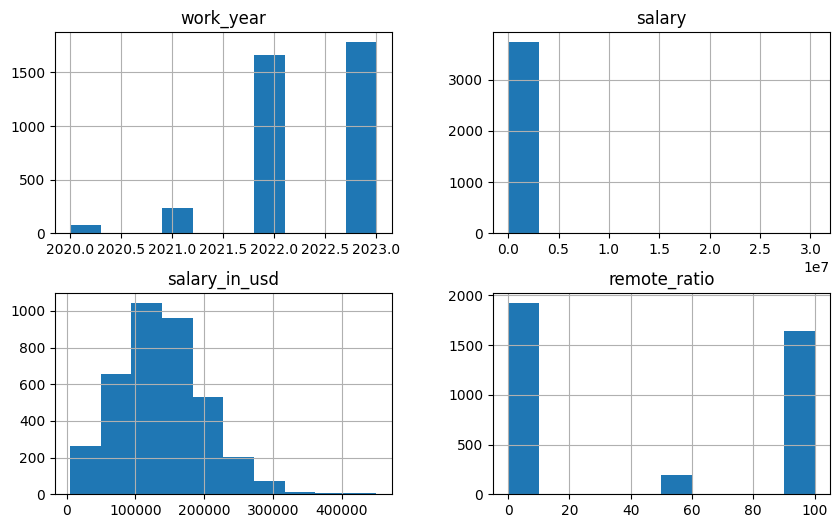

In [4]:
# histograms
numeric_variables.hist(bins=10, figsize=(10, 6))
plt.show()

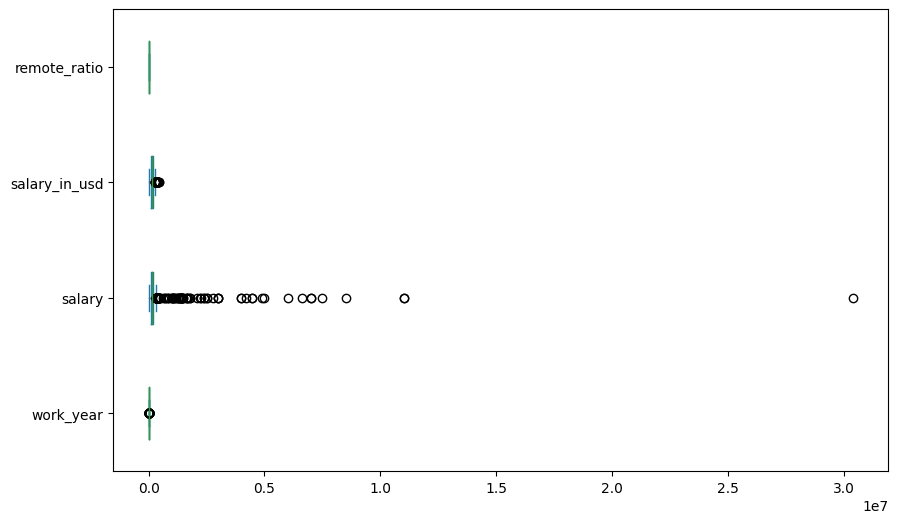

In [5]:
# Boxplot
numeric_variables.plot(kind='box', vert=False, figsize=(10, 6))
plt.show()

In [6]:
# check the data types
print(data.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


2.Visualise data

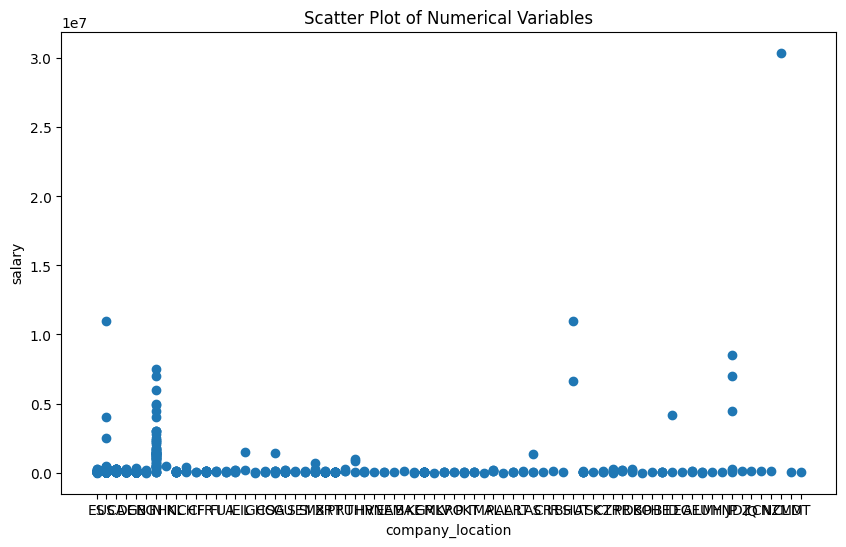

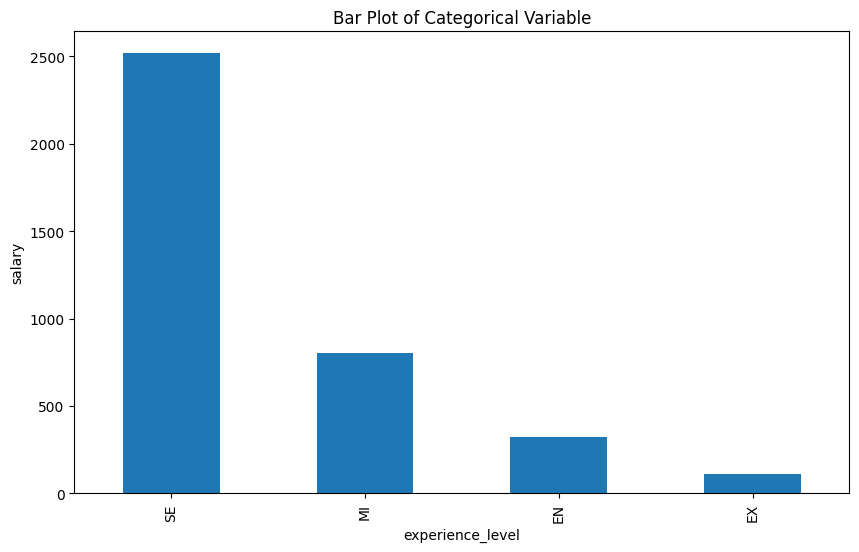

In [10]:
import matplotlib.pyplot as plt

# Visualize numerical variables
plt.figure(figsize=(10, 6))
plt.scatter(data['company_location'], data['salary'])
plt.xlabel('company_location')
plt.ylabel('salary')
plt.title('Scatter Plot of Numerical Variables')
plt.show()

# Visualize categorical variables
plt.figure(figsize=(10, 6))
data['experience_level'].value_counts().plot(kind='bar')
plt.xlabel('experience_level')
plt.ylabel('salary')
plt.title('Bar Plot of Categorical Variable')
plt.show()

3. clean data

In [12]:
# Handle missing values
data = data.dropna()

# Drop entire attribute containing missing values
data = data.dropna(axis=1)

# Impute missing values for a particular attribute
data['salary'] = data['salary'].fillna(mean)

4. Identify correlated variables

e:\2023-phrase-2 data science Dan WEI\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
e:\2023-phrase-2 data science Dan WEI\venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


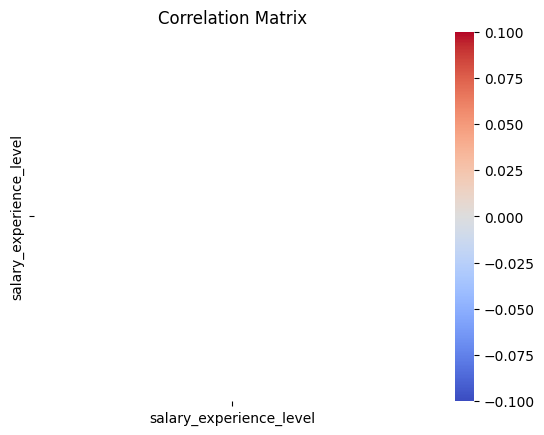

In [14]:
import seaborn as sns
data_encoded = pd.get_dummies('experience_level','salary')
correlation_matrix = data_encoded.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Summary

During the exploratory data analysis (EDA) and preprocessing phase, the following steps were performed:

1. Variables were identified and understood by loading the dataset and displaying the first ten instances.
2. Numerical summaries were generated, including the mean and standard deviation of the numerical columns.
3. Graphical summaries were created, like histograms for numerical columns, and box and whisker plots for visualizing data distributions and outliers.
4. Data types were converted if necessary to ensure that all values were numerical for machine learning purposes.
5. The data was visualized using various plots to identify trends, patterns, and anomalies.
6. Data cleaning steps were performed, including handling missing values (dropping instances or imputing missing values), dealing with outliers (removing or standardizing them), addressing imbalanced data (undersampling or oversampling), and selecting relevant features for modeling.
7. Correlations between variables were analyzed using a correlation matrix and visualized using a heatmap.
8. A summary was written, highlighting the steps taken during EDA and preprocessing, as well as any interesting findings or observations made during the process.